# Red Wine Quality Prediction
The dataset contains red vinho verde wine samples from the north of Portugal. The goal is to model wine quality based on physicochemical tests.

#### Data Exploration

In [1]:
import numpy as np
import torch
import os
from os import path
from sklearn.model_selection import KFold
import pandas as pd
import zipfile
import urllib.request

if not path.exists("UCI"): 
    os.mkdir("UCI")

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
file_name = url.split('/')[-1]
if not path.exists("UCI/" + file_name):
    urllib.request.urlretrieve(url, "UCI/" + file_name)

ds = pd.read_csv('UCI/winequality-red.csv', header=1, delimiter=';')
ds.describe()

7.4          0.7            0          1.9        0.076  \
count  1598.000000  1598.000000  1598.000000  1598.000000  1598.000000   
mean      8.320213     0.527713     0.271145     2.539205     0.087474   
std       1.741489     0.179064     0.194744     1.410279     0.047079   
min       4.600000     0.120000     0.000000     0.900000     0.012000   
25%       7.100000     0.390000     0.090000     1.900000     0.070000   
50%       7.900000     0.520000     0.260000     2.200000     0.079000   
75%       9.200000     0.640000     0.420000     2.600000     0.090000   
max      15.900000     1.580000     1.000000    15.500000     0.611000   

                11           34       0.9978         3.51         0.56  \
count  1598.000000  1598.000000  1598.000000  1598.000000  1598.000000   
mean     15.877972    46.475594     0.996746     3.310989     0.658210   
std      10.462720    32.904142     0.001888     0.154355     0.169542   
min       1.000000     6.000000     0.990070     2.740000     0.330000   
25%       7.000000    22.000000     0.995600     3.210000     0.550000   
50%      14.000000    38.000000     0.996750     3.310000     0.620000   
75%      21.000000    62.000000     0.997837     3.400000     0.730000   
max      72.000000   289.000000     1.003690     4.010000     2.000000   

               9.4            5  
count  1598.000000  1598.000000  
mean     10.423623     5.636421  
std       1.065694     0.807665  
min       8.400000     3.000000  
25%       9.500000     5.000000  
50%      10.200000     6.000000  
75%      11.100000     6.000000  
max      14.900000     8.000000

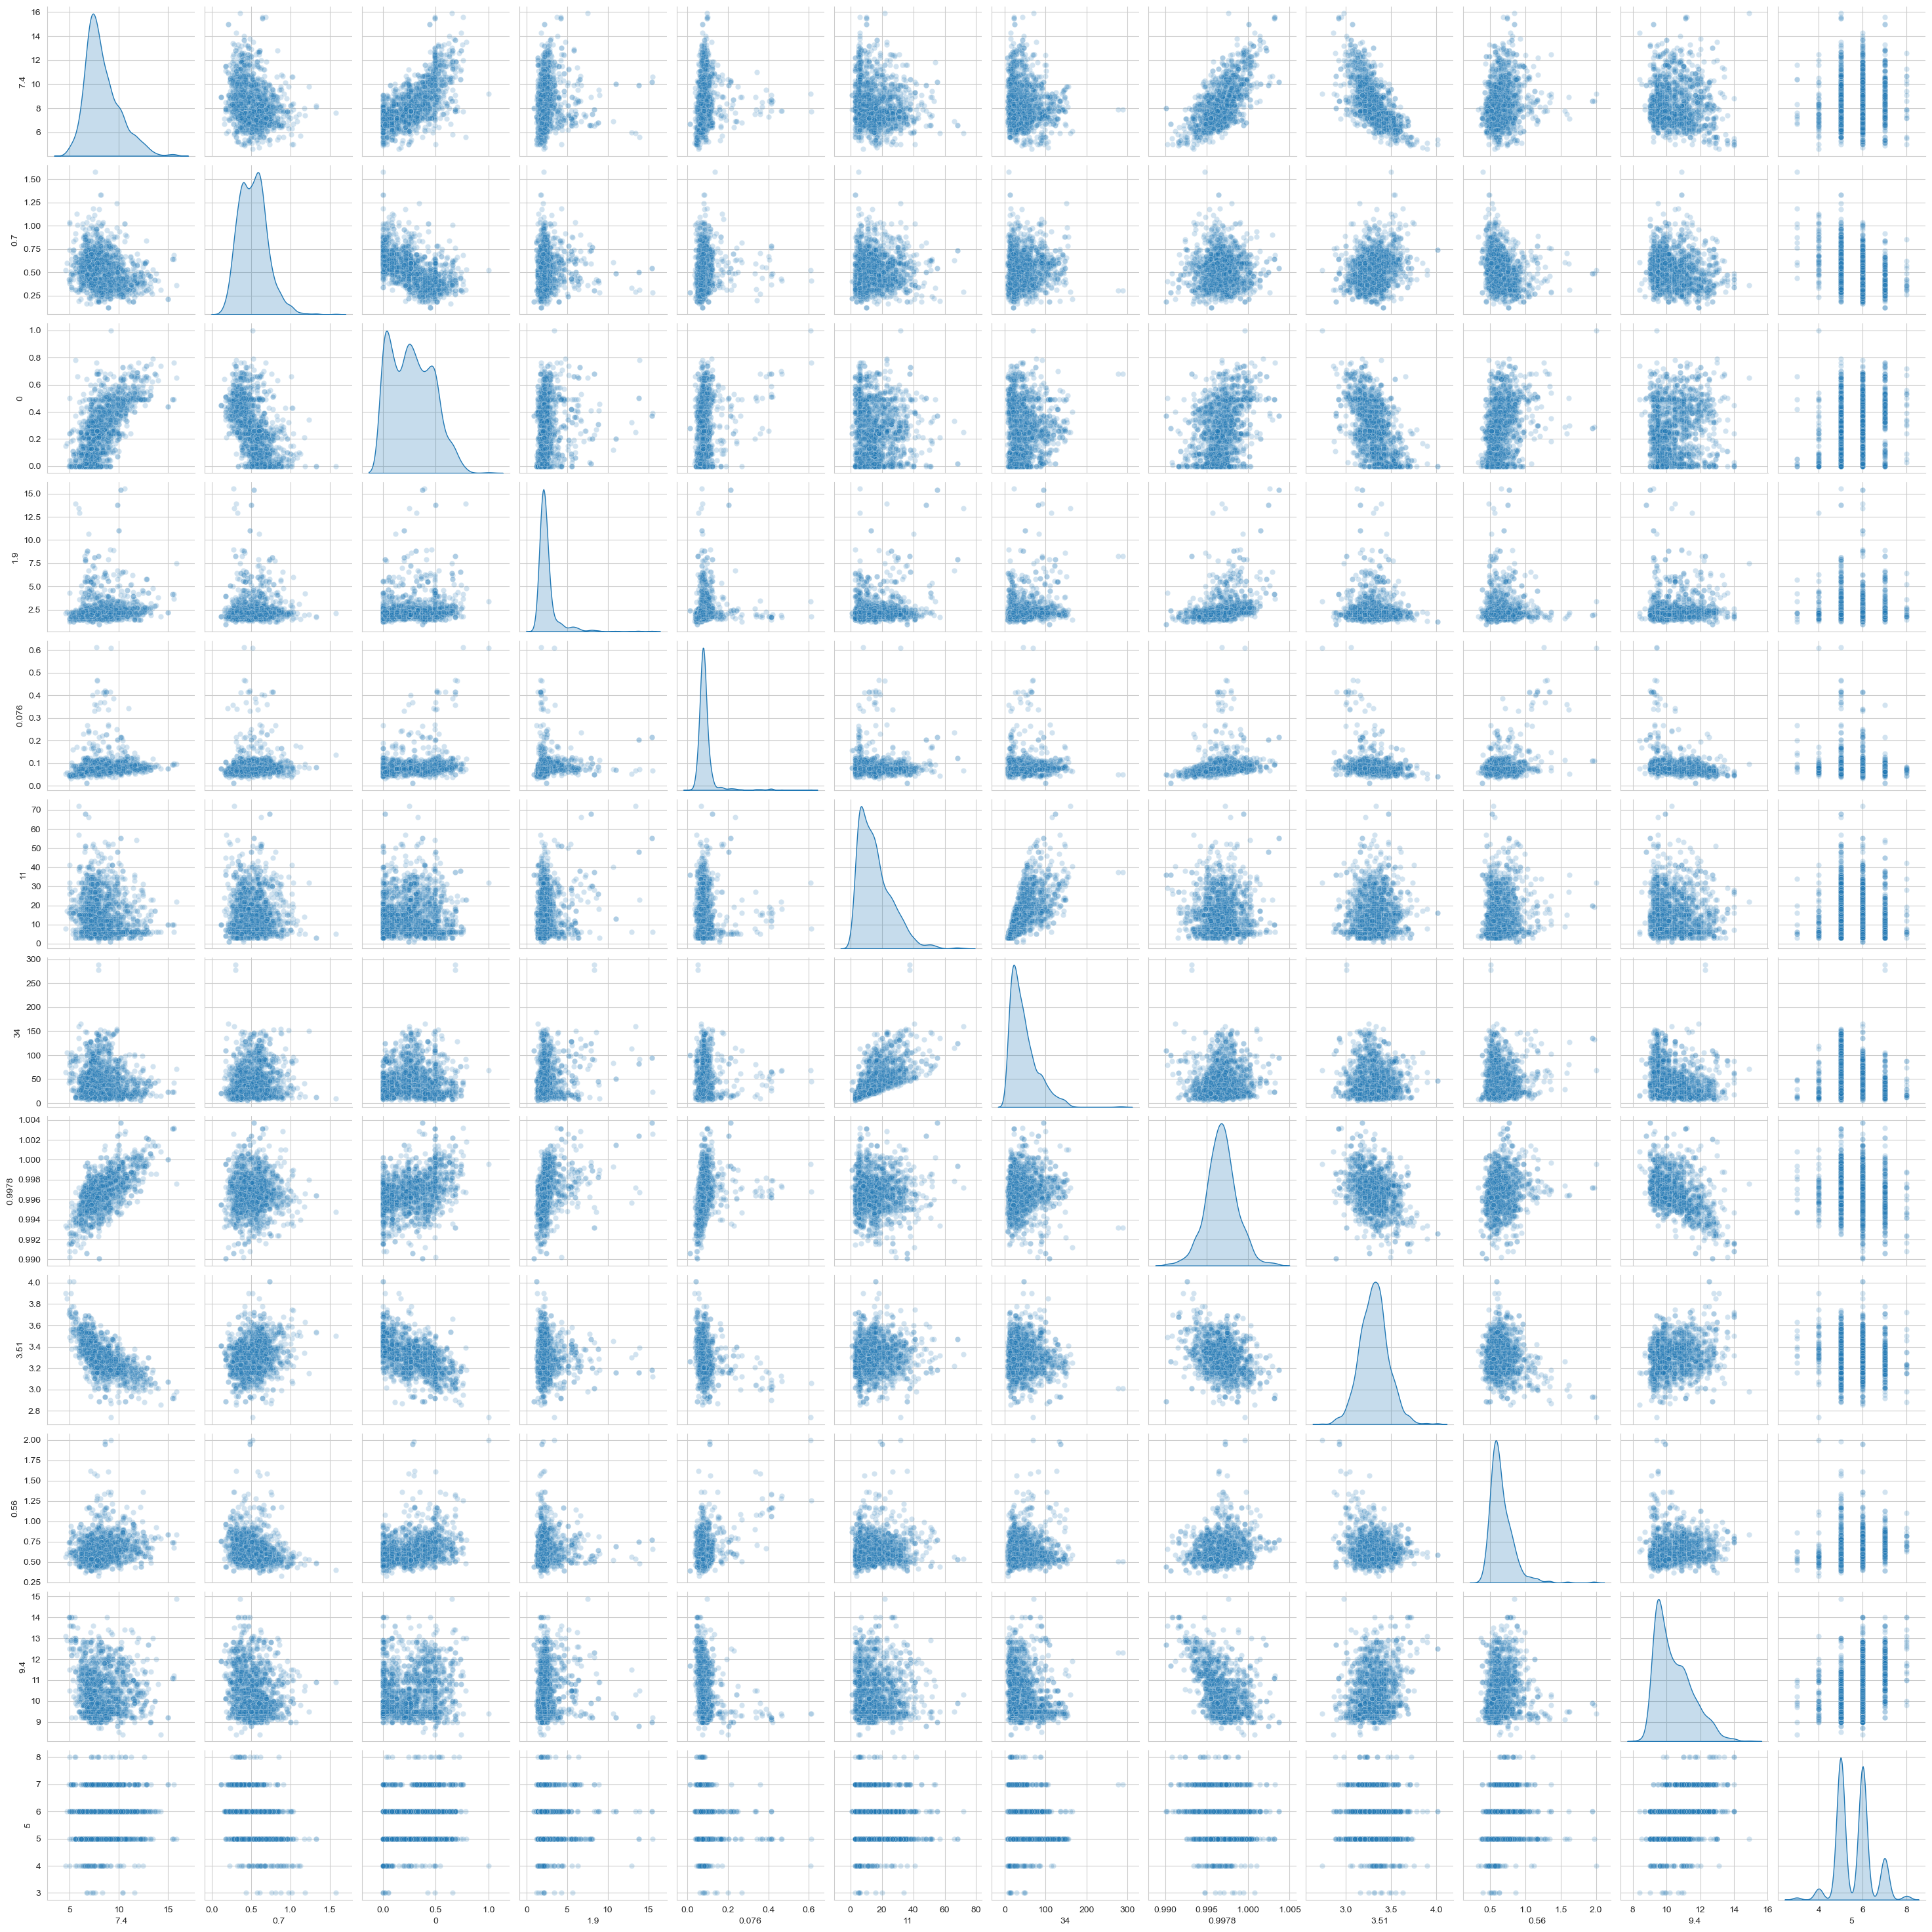

In [2]:
import seaborn as sns

sns.pairplot(ds,diag_kind='kde',plot_kws={'alpha': .2});

In [3]:
# shuffle data
data = ds.values[np.random.permutation(np.arange(len(ds.values)))]

in_dim, out_dim = data.shape[1] - 1, 1

X, y = data[:, :in_dim], data[:, in_dim:]

# normalize and center data
X_means, X_stds = X.mean(axis=0), X.std(axis=0)
y_means, y_stds = y.mean(axis=0), y.std(axis=0)
X = (X - X_means)/X_stds
y = (y - y_means)/y_stds

#### 5 Fold Cross Validation for Linear Regression

In [4]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

kf =KFold(n_splits=5, shuffle=True, random_state=42)
# We use negative mean squared error as score because sklearn expects a score, not a loss
score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {-score}')

print(f'Avg MSE = {"{:.2f}".format(-score.mean())}')

Scores for each fold: [0.65494281 0.59963423 0.72346987 0.61832293 0.67805404]
Avg MSE = 0.65


#### 5 Fold Cross Validation for Decision Tree

In [5]:
score = cross_val_score(tree.DecisionTreeRegressor(random_state= 42), X, y, cv=kf, scoring="neg_mean_squared_error")

print(f'Scores for each fold: {-score}')
print(f'Avg MSE = {"{:.2f}".format(-score.mean())}')

Scores for each fold: [0.92515882 0.89160383 0.97309451 1.05308249 1.00499653]
Avg MSE = 0.97


#### 5 Fold Cross Validation for Random Forest

In [6]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X, y.ravel(), cv= kf, scoring="neg_mean_squared_error")

print(f'Scores for each fold: {-score}')
print(f'Avg MSE = {"{:.2f}".format(-score.mean())}')

Scores for each fold: [0.51278533 0.44475213 0.53552027 0.48347498 0.54267168]
Avg MSE = 0.50


#### 5 Fold Cross for Hyper param optimization of Decision Tree

In [7]:
max_depth = [1,5,10,20,50,100]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    print(f'Avg MSE = {"{:.2f}".format(-score.mean())}')

For max depth: 1
Avg MSE = 0.82
For max depth: 5
Avg MSE = 0.72
For max depth: 10
Avg MSE = 0.85
For max depth: 20
Avg MSE = 0.97
For max depth: 50
Avg MSE = 0.97
For max depth: 100
Avg MSE = 0.97


#### 5 Fold Cross for Hyper param optimization of Random Forest

In [8]:
estimators = [10, 50, 100, 150, 200, 250, 300]

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X, y.ravel(), cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    print(f'Avg MSE = {"{:.2f}".format(-score.mean())}')

For estimators: 10
Avg MSE = 0.55
For estimators: 50
Avg MSE = 0.51
For estimators: 100
Avg MSE = 0.50
For estimators: 150
Avg MSE = 0.50
For estimators: 200
Avg MSE = 0.50
For estimators: 250
Avg MSE = 0.50
For estimators: 300
Avg MSE = 0.50


#### NN Regressor

In [12]:
from torch import nn

class NNRegressor(nn.Module):
    def __init__(self, layers=[20,30,20], n_features=11, activation=nn.ReLU):
        super().__init__()
        self.layers = []
        self.activation_functions = []

        self.layers.append(nn.Linear(n_features, layers[0]))
        self.activation_functions.append(activation())
        self.add_module(f"layer{0}", self.layers[-1])
        self.add_module(f"act{0}", self.activation_functions[-1])

        for i in range(1, len(layers)):
            self.layers.append(nn.Linear(self.layers[-1].out_features, layers[i]))
            self.activation_functions.append(activation())
            self.add_module(f"layer{i}", self.layers[-1])
            self.add_module(f"act{i}", self.activation_functions[-1])

        self.output = nn.Linear(self.layers[-1].out_features, 1)

    def forward(self, x):
        for layer, act in zip(self.layers, self.activation_functions):
            x=act(layer(x))

        x = self.output(x)
        return x

#### Grid search hyper param optimization for NN

In [13]:
from sklearn.model_selection import GridSearchCV
from torch import optim
from skorch import NeuralNetRegressor

param_grid = {
    'optimizer': [optim.Adam, optim.Adamax, optim.NAdam],
    'module__activation': [nn.Identity, nn.ReLU, nn.GELU, nn.Tanh, nn.Sigmoid],
    'batch_size': [10, 25, 50],
    'module__layers': [[10,20,10],[30,20,10],[30,30,30]],
    'lr': [0.0001, 0.001, 0.01],
}

grid = GridSearchCV(
    estimator = NeuralNetRegressor(module=NNRegressor),
    param_grid = param_grid,
    n_jobs = -1,
    cv = 3,
    error_score = 'raise',
    return_train_score = True,
    verbose = 0,
    scoring = 'neg_mean_squared_error'
)

In [14]:
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

grid.fit(X_tensor, y_tensor)

  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        1.0533        1.0106  0.0751
      2        1.0303        0.9919  0.0438
      3        1.0087        0.9738  0.0417
  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        1.0152        0.9754  0.0776
      4        0.9878        0.9563  0.0456
      2        0.9702        0.9308  0.0542
      5        0.9675        0.9395  0.0362
      3        0.9203        0.8823  0.0500
      6        0.9478        0.9234  0.0480
      4        0.8657        0.8316  0.0581
      7        0.9288        0.9080  0.0552
  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        1.1248        1.1526  0.0818
  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.9838        0.9177  0.0849
  epoch    train_loss    valid_loss     dur
-------  ------------  ---------

GridSearchCV(cv=3, error_score='raise',
             estimator=<class 'skorch.regressor.NeuralNetRegressor'>[uninitialized](
  module=<class '__main__.NNRegressor'>,
),
             n_jobs=-1,
             param_grid={'batch_size': [10, 25, 50],
                         'lr': [0.0001, 0.001, 0.01],
                         'module__activation': [<class 'torch.nn.modules.linear.Identity'>,
                                                <class 'torch.nn.modules.activation.ReLU'>,
                                                <class 'torch.nn.modules.activation.GELU'>,
                                                <class 'torch.nn.modules.activation.Tanh'>,
                                                <class 'torch.nn.modules.activation.Sigmoid'>],
                         'module__layers': [[10, 20, 10], [30, 20, 10],
                                            [30, 30, 30]],
                         'optimizer': [<class 'torch.optim.adam.Adam'>,
                                       <class 'torch.optim.adamax.Adamax'>,
                                       <class 'torch.optim.nadam.NAdam'>]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [15]:
print("Best params:")
grid.best_params_

Best params:


{'batch_size': 25,
 'lr': 0.01,
 'module__activation': torch.nn.modules.activation.Tanh,
 'module__layers': [30, 30, 30],
 'optimizer': torch.optim.adamax.Adamax}

In [16]:
print(f'Best MSE = {"{:.2f}".format(-grid.best_score_)}')

Best MSE = 0.61


# Results
The best model is the Random Forest with at least 100 estimators. The avarage MSE for the model is 0.5 